In [1]:
import numpy as np
import pandas as pd

import torch

In [2]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [3]:
matplotlib.rc('font', size=14)

In [4]:
import sys

In [5]:
from copy import deepcopy

In [6]:
sys.path.append('../')
sys.path.append('../../')

In [8]:
train_target = pd.read_csv('../../data/gender/gender_train.csv')
train_target.head(5)

,customer_id,gender
0,10928546,1
1,69348468,1
2,61009479,0
3,74045822,0
4,27979606,1


In [9]:
df_vectors = pd.read_pickle('../../data/gender/embeddings.pickle').set_index('customer_id')
embedding_columns = df_vectors.columns.tolist()
df_vectors = pd.merge(df_vectors, train_target.set_index('customer_id'), left_index=True, right_index=True)
df_vectors.head()

,v000,v001,v002,v003,v004,v005,v006,v007,v008,v009,...,v247,v248,v249,v250,v251,v252,v253,v254,v255,gender
customer_id,,,,,,,,,,,,,,,,,,,,,
22899,0.024572,-0.027768,0.085960,0.009999,0.032593,0.039693,0.010867,-0.069351,0.028719,0.011899,...,-0.033977,0.019162,-0.014311,0.114827,0.000876,0.004510,0.028197,-0.133454,0.036480,1
28753,0.030289,0.040644,0.055885,0.088719,-0.039450,0.020307,0.071713,-0.030921,0.080338,0.039057,...,-0.052148,0.035819,-0.037979,0.059325,0.073738,-0.072793,0.001940,-0.123042,-0.072332,0
42096,-0.018941,0.003352,0.071742,-0.014067,0.042242,0.119766,0.014823,-0.006253,0.040682,0.036544,...,-0.014152,0.040645,-0.036569,0.066485,0.004847,0.027786,-0.031839,-0.123970,-0.029856,0
50940,0.007592,-0.074670,0.071075,-0.055681,0.068929,0.058257,-0.009138,-0.061874,0.024931,-0.006279,...,-0.019891,0.027620,-0.036296,0.014827,0.010734,0.084954,0.003951,-0.116016,-0.013753,0
52926,0.028974,-0.054694,0.058052,-0.049207,0.043766,0.066402,-0.008807,0.024085,0.051984,0.107504,...,-0.035246,0.104549,-0.032412,0.060139,0.075876,0.070773,-0.024714,-0.122972,0.051482,1


In [10]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [11]:
df_pca = df_vectors.copy()

In [52]:
pca = PCA(n_components=32)
pca.fit(df_pca[embedding_columns].values)
np.sum(pca.explained_variance_ratio_)

0.7294461

In [53]:
pca_results = pca.transform(df_pca[embedding_columns].values)
df_pca['_pca_x'] = pca_results[:, 0]
df_pca['_pca_y'] = pca_results[:, 1]


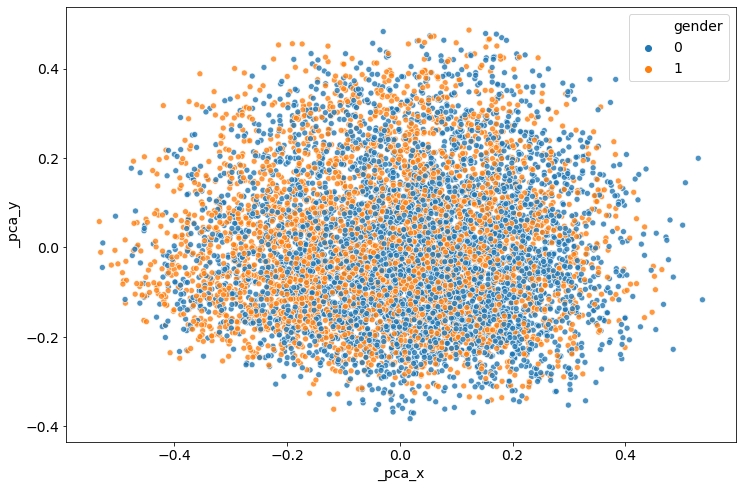

In [56]:
_, axs = plt.subplots(1, 1, figsize=(12, 8))
sns.scatterplot(
    x='_pca_x', y='_pca_y',
    hue='gender',
    # style='bins',
    data=df_pca,
    palette='tab10',
    alpha=0.8,
    ax=axs
)
plt.show()

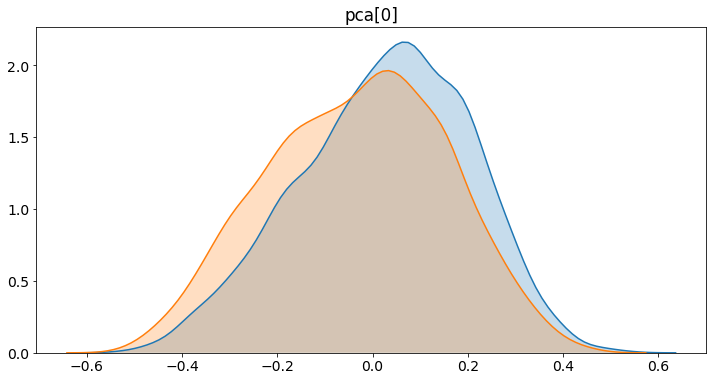

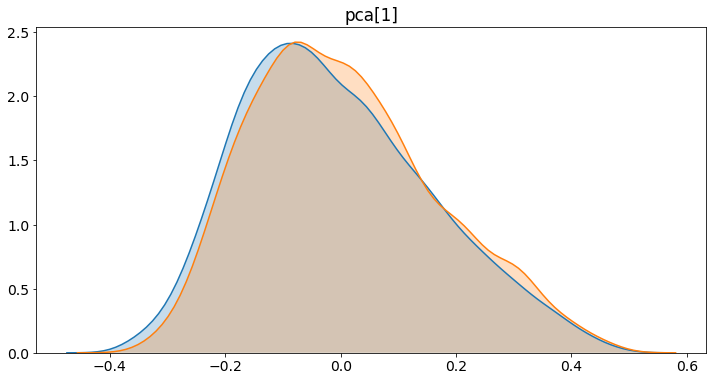

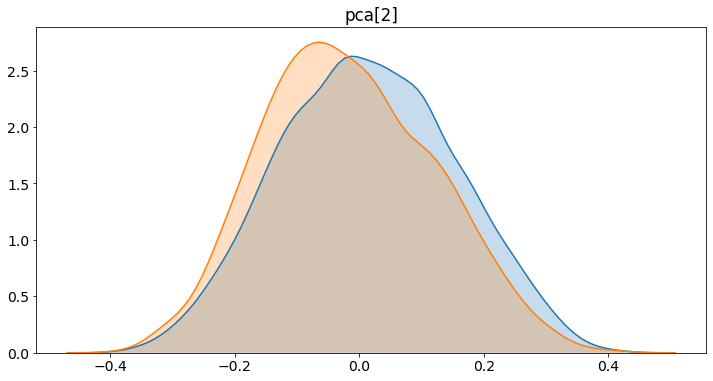

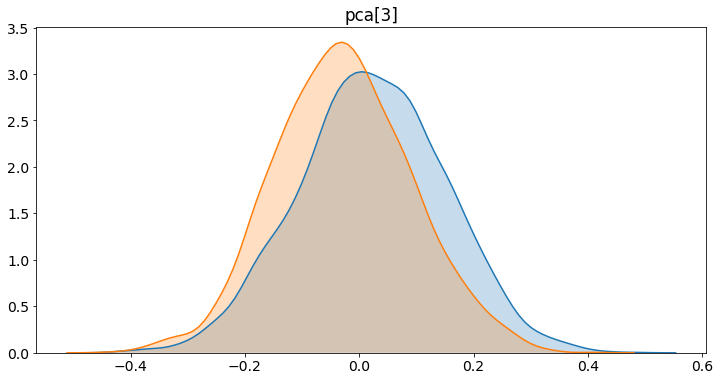

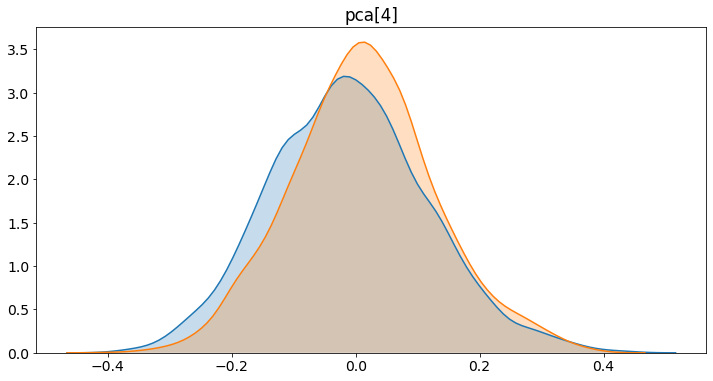

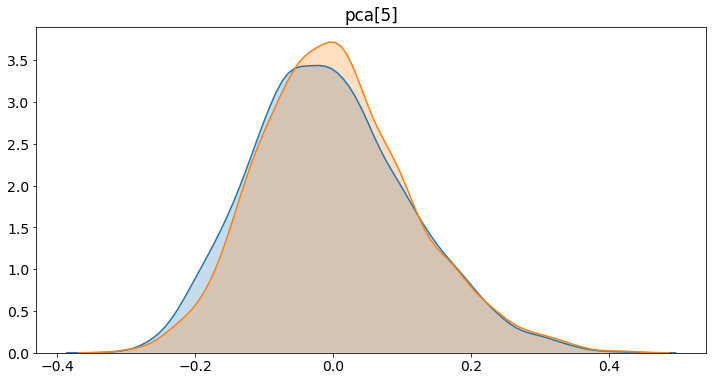

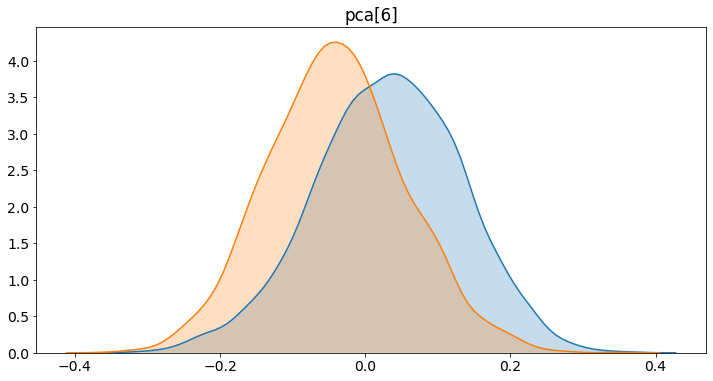

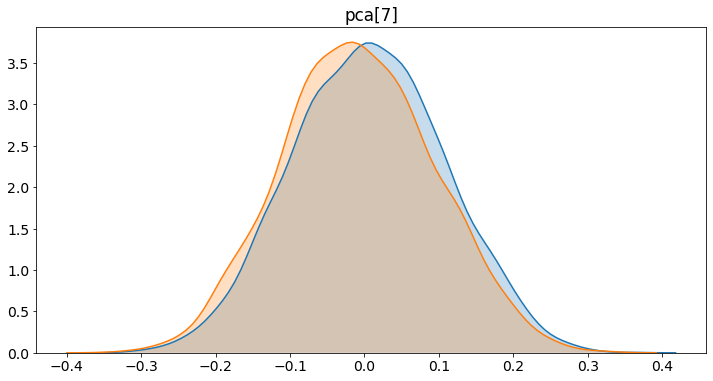

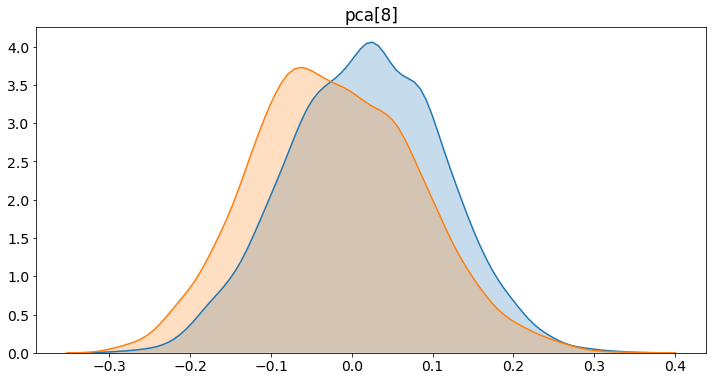

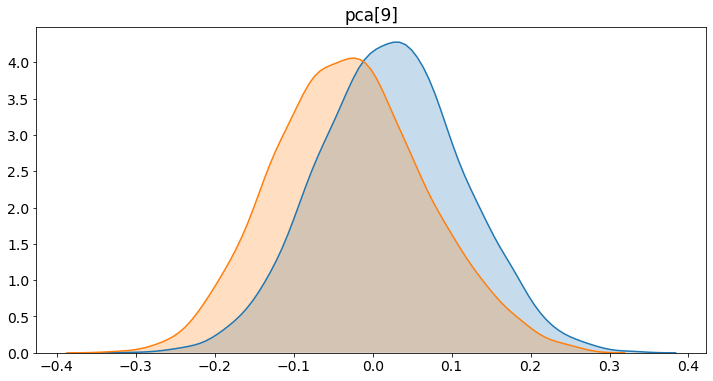

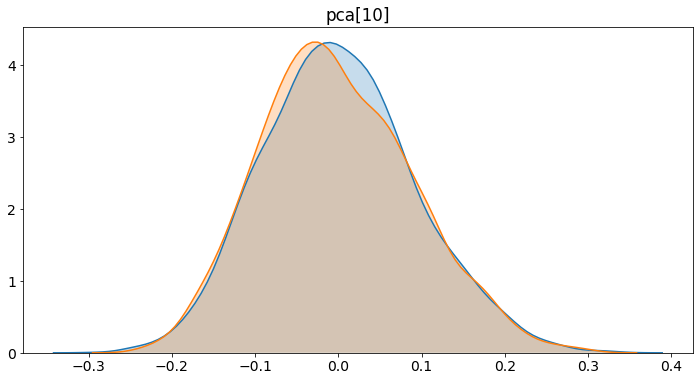

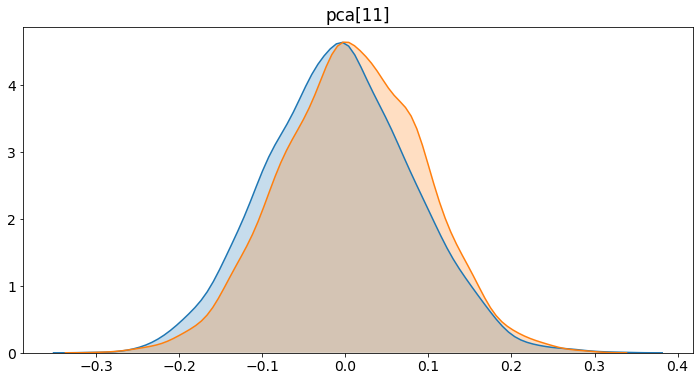

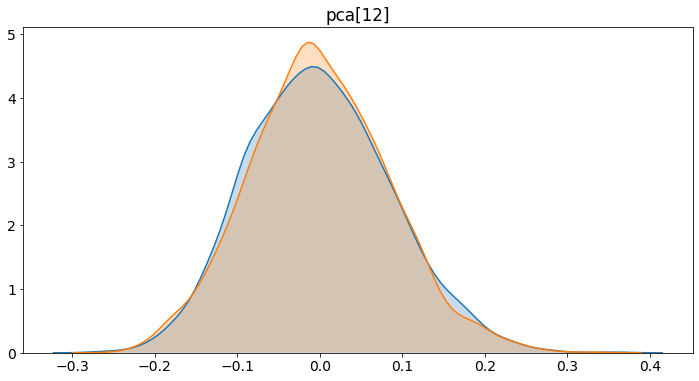

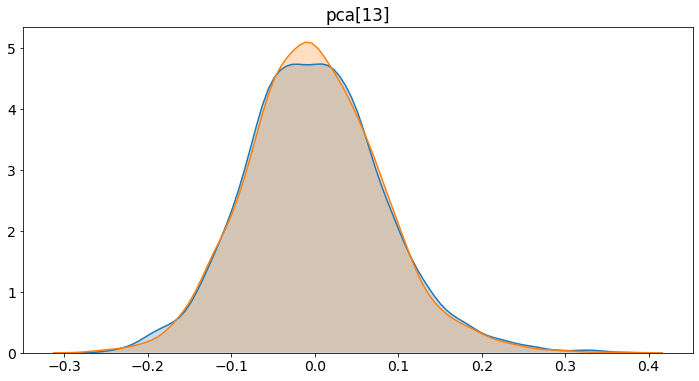

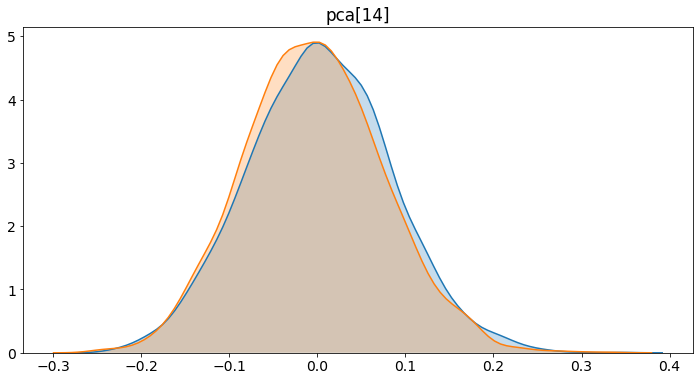

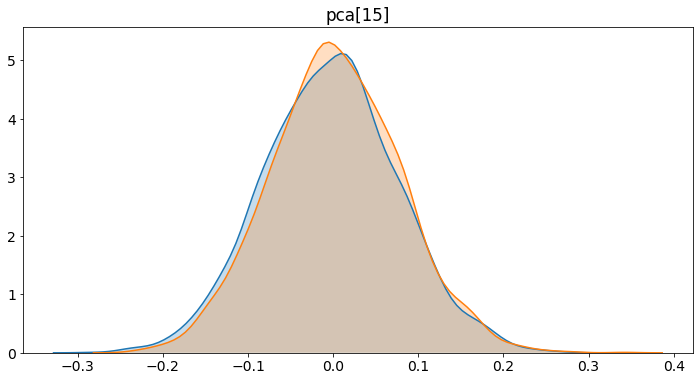

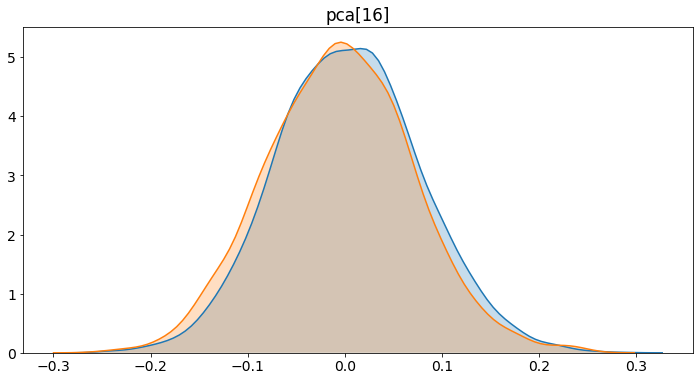

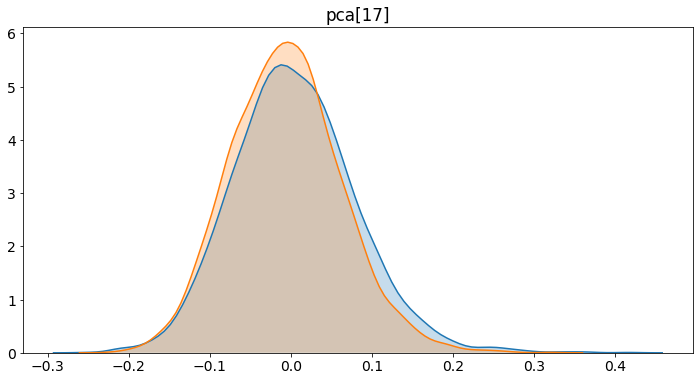

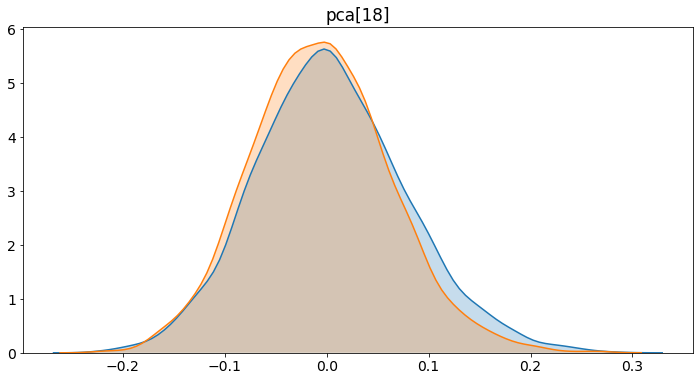

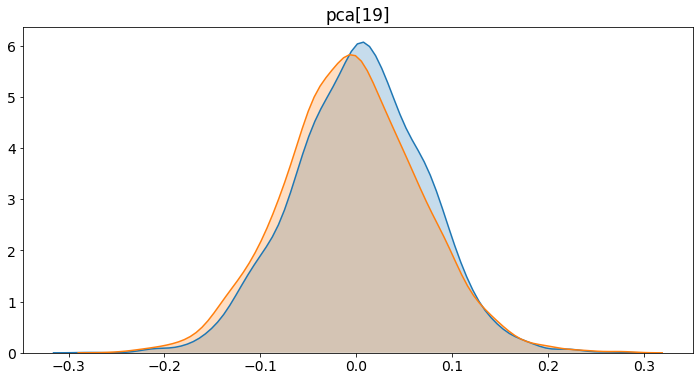

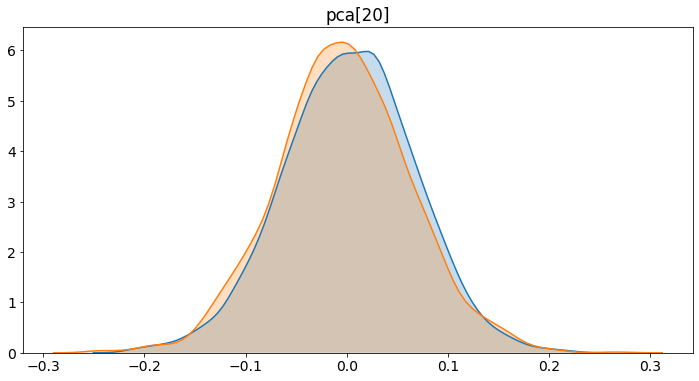

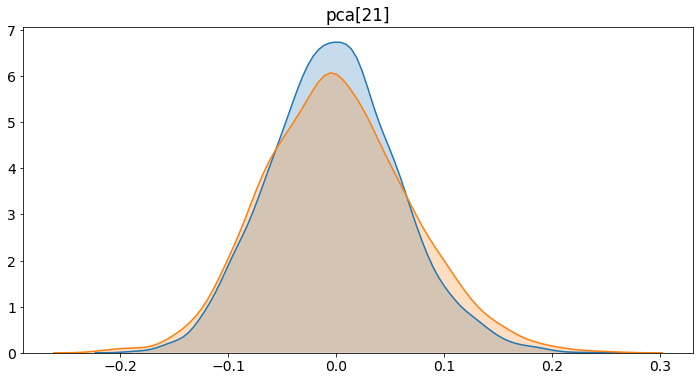

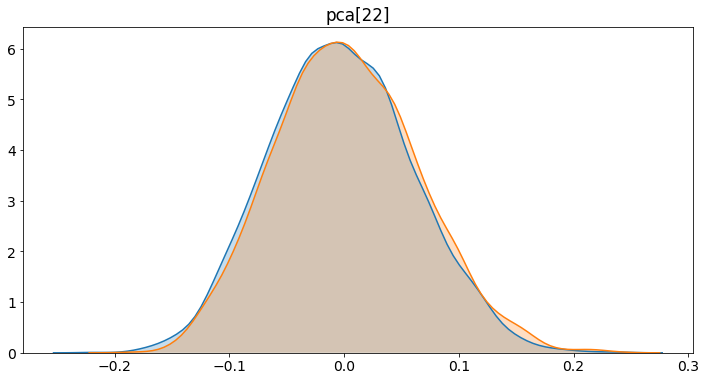

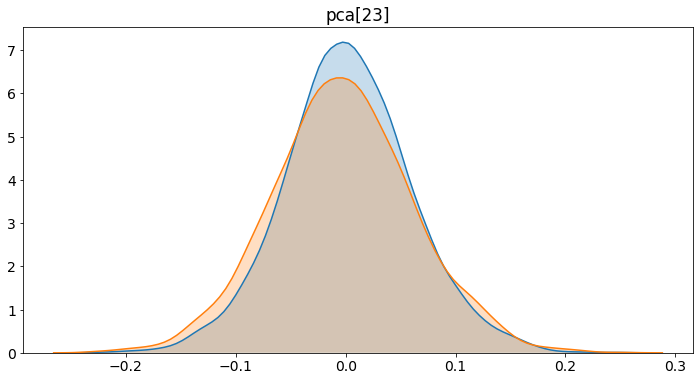

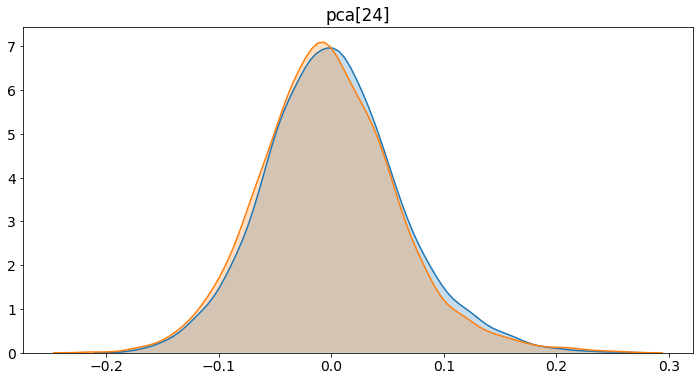

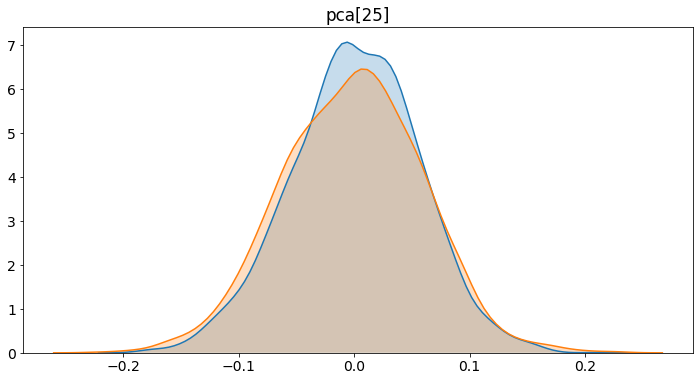

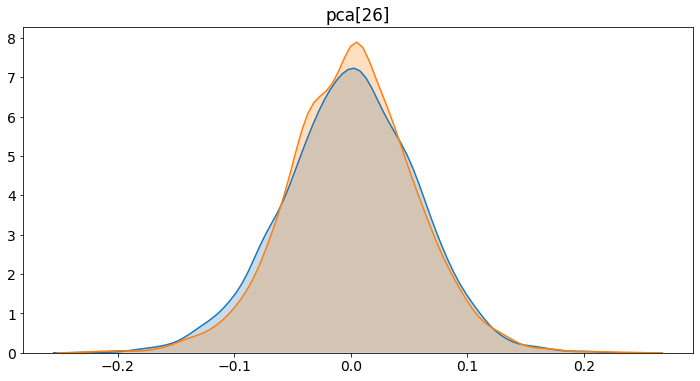

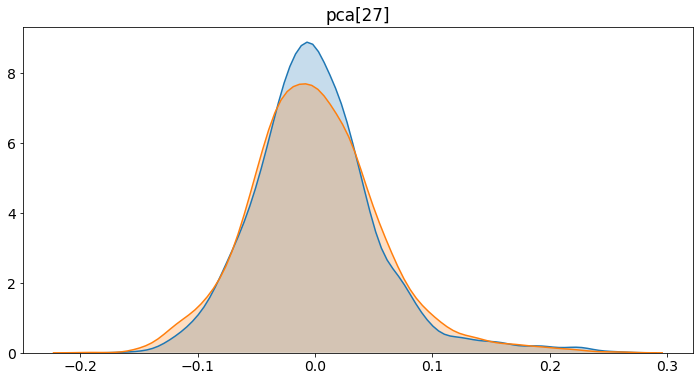

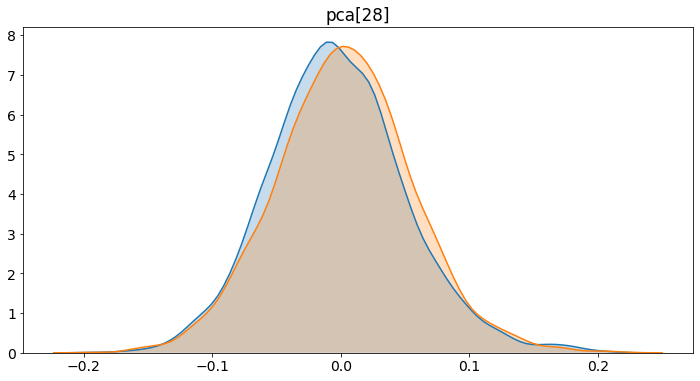

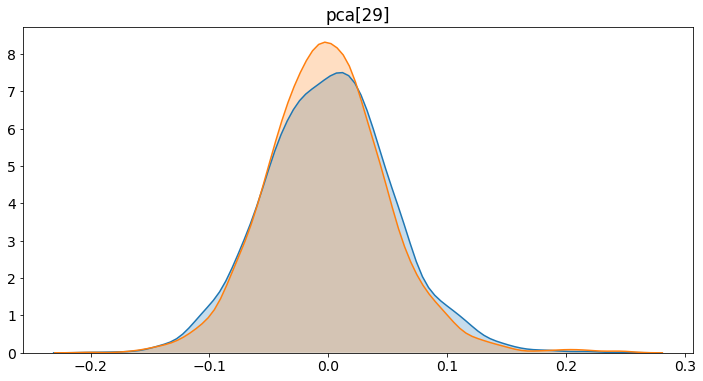

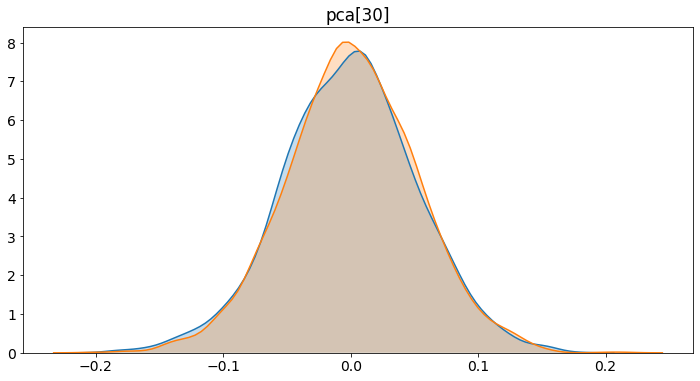

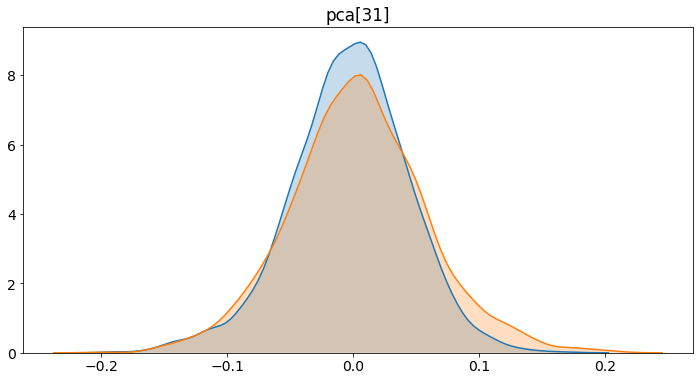

In [55]:
for i in range(32):
    plt.figure(figsize=(12,6))

    for b in [0, 1]:
        ix = np.arange(len(pca_results))[df_pca['gender'].eq(b)]
        sns.kdeplot(pca_results[ix, i], shade=True)
    plt.title(f'pca[{i}]')
    plt.show()

In [62]:
if len(df_pca) > 10000:
    df_tsne = df_pca.sample(n=10000).copy()
else:
    df_tsne = df_pca.copy()

In [63]:
tsne = TSNE(n_components=2, verbose=1, n_iter=300)
tsne_results = tsne.fit_transform(df_tsne[embedding_columns].values)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 8215 samples in 0.423s...
[t-SNE] Computed neighbors for 8215 samples in 55.592s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8215
[t-SNE] Computed conditional probabilities for sample 2000 / 8215
[t-SNE] Computed conditional probabilities for sample 3000 / 8215
[t-SNE] Computed conditional probabilities for sample 4000 / 8215
[t-SNE] Computed conditional probabilities for sample 5000 / 8215
[t-SNE] Computed conditional probabilities for sample 6000 / 8215
[t-SNE] Computed conditional probabilities for sample 7000 / 8215
[t-SNE] Computed conditional probabilities for sample 8000 / 8215
[t-SNE] Computed conditional probabilities for sample 8215 / 8215
[t-SNE] Mean sigma: 0.176732
[t-SNE] KL divergence after 50 iterations with early exaggeration: 95.721970
[t-SNE] KL divergence after 300 iterations: 3.348723


In [72]:
df_tsne['tsne_x'] = tsne_results[:, 0]
df_tsne['tsne_y'] = tsne_results[:, 1]

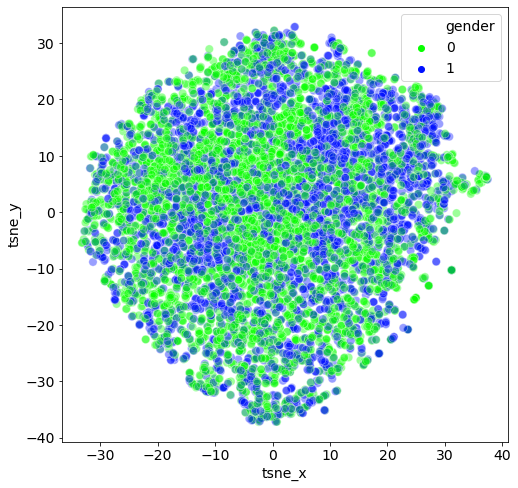

In [74]:
_, axs = plt.subplots(1, 1, figsize=(8, 8))
sns.scatterplot(
    x='tsne_x', y='tsne_y',
    hue='gender',
    data=df_tsne,
    palette='hsv',
    alpha=0.4, s=70,
    ax=axs,
)
plt.show()